# Proyecto final - Obtención de datos
#### Pablo Álvarez García, Antonio Fernández Martín y Álvaro Corrochano López

# Web Scrapping

In [5]:
# Importo Beautiful Soup
from bs4 import BeautifulSoup
# Importo requests para pillar el código html de donde quiera
import requests

In [6]:
web = requests.get('https://www.metagamevgc.com/team-compendium/2019/12/16/vgc-2020-sword-and-shield-team-compendium')
soup = BeautifulSoup(web.content, 'html.parser')

In [7]:
# Cogemos la Pokédex
webDex = requests.get('https://pokemondb.net/pokedex/national')
dexSoup  = BeautifulSoup(webDex.content, 'html.parser')

In [8]:
pokedex = {}
types = [['itype', 'grass'], ['itype', 'poison'], ['itype', 'fire'], ['itype', 'flying'], ['itype', 'water'], 
         ['itype', 'bug'], ['itype', 'normal'], ['itype', 'electric'], ['itype', 'ground'], ['itype', 'fairy'], 
         ['itype', 'fighting'], ['itype', 'psychic'], ['itype', 'rock'], ['itype', 'steel'], 
         ['itype', 'ice'], ['itype', 'ghost'], ['itype', 'dark'], ['itype', 'dragon']]

for name in dexSoup.find_all('a'):
    if name.get('class') == ['ent-name']:
        pok = name.get_text()
        pokedex[pok] = {'type1' : 'None', 'type2' : 'None'}
    if name.get('class') in types:
        if pokedex[pok]['type1'] == 'None':
            pokedex[pok]['type1'] = name.get_text()
        else:
            pokedex[pok]['type2'] = name.get_text()

In [9]:
types = [['type-grass'], ['type-water'], ['type-ghost'], ['type-rock'], ['type-fire'], ['type-ground'], ['type-normal'], 
        ['type-flying'], ['type-fighting'], ['type-bug'], ['type-dragon'], ['type-dark'], ['type-fairy'], ['type-electric'],
         ['type-ice'], ['type-psychic'], ['type-steel'], ['type-poison']]


pokepasteList = []
teamList = []

for paste in soup.find_all('a'):
    if paste.get_text().lower() == 'pokepaste' :
        pokepasteList.append(paste.get('href'))

        team = []

        pag = requests.get(paste.get('href'))
        pokesoup = BeautifulSoup(pag.content, 'html.parser')

        for pok in pokesoup.find_all('pre'):
            pokplit = pok.get_text().split(' ')
            pokplit = pokplit[0].split('-')

            if pokplit[0] in pokedex :
                team.append(pokplit[0])

        teamList.append(team)

In [10]:
print(len(teamList))

64


In [11]:
for team in teamList:
    print(len(team))

6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
0
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6


In [12]:
print(len(pokepasteList))
for link in pokepasteList:
    print(link)

64
https://pokepast.es/a8394695fa2dd781
https://pokepast.es/22f95fff7e1256b1
https://pokepast.es/7086cc0c2c13c136
https://pokepast.es/c3a98a31b461241f
https://pokepast.es/a3ef93cdf0f97bdc
https://pokepast.es/7b57982bc1c880ba
https://pokepast.es/464b95e5d28d660e
https://pokepast.es/de987aa62e2c7697
https://pokepast.es/af2e8abc639ebec9
https://pokepast.es/bd829ff6e51d280d
https://pokepast.es/9cb3e92b5ccad33c
https://pokepast.es/164facfc3c6c09d6
https://pokepast.es/aab39445891fa427
https://pokepast.es/61148c81c1a261f1
https://pokepast.es/799d70c61dd19b8a
https://pokepast.es/2b17b4b53999a333
https://pokepast.es/1c915d5702a31138
https://pokepast.es/e712c43f45faae1e
https://pokepast.es/ed1461a98d00bdea
https://pokepast.es/03541366ba299453
https://pokepast.es/de235819f4d7582d
https://pokepast.es/482b387b16d4b5ac
https://pokepast.es/409884f19d420632
https://pokepast.es/86d980254a647d6e
https://pokepast.es/364231897a3d453a
https://pokepast.es/106d83859807628f
https://pokepast.es/beff1a6aae2c66c

# Construcción de la red

In [13]:
import networkx as nx
import itertools as it

In [14]:
G = nx.Graph()

In [16]:
apariciones = {}
for team in teamList:
    for pok in team:
        if(pok in apariciones):
            apariciones[pok] += 1
        else:
            apariciones[pok] = 1
        G.add_node(pok, type1 = pokedex[pok]['type1'], type2 = pokedex[pok]['type2'])
        
        
edgeList = []
for team in teamList:
    edgeList.append([x for x in it.combinations(team, 2)])

for perm in edgeList :
    for pokPair in perm :
        if G.has_edge(pokPair[0], pokPair[1]):
            G[pokPair[0]][pokPair[1]]['weight'] += 1
        else:
            G.add_edge(pokPair[0], pokPair[1], weight = 1)
G.edges.data('weight')

EdgeDataView([('Tyranitar', 'Excadrill', 2), ('Tyranitar', 'Braviary', 2), ('Tyranitar', 'Hydreigon', 1), ('Tyranitar', 'Mimikyu', 1), ('Tyranitar', 'Rotom', 3), ('Tyranitar', 'Arcanine', 1), ('Tyranitar', 'Whimsicott', 1), ('Tyranitar', 'Dragapult', 2), ('Tyranitar', 'Gastrodon', 2), ('Tyranitar', 'Corviknight', 2), ('Tyranitar', 'Indeedee', 3), ('Tyranitar', 'Hatterene', 1), ('Tyranitar', 'Incineroar', 3), ('Tyranitar', 'Urshifu', 3), ('Tyranitar', 'Alakazam', 1), ('Tyranitar', 'Slowbro', 2), ('Tyranitar', 'Torkoal', 1), ('Tyranitar', 'Luxray', 1), ('Tyranitar', 'Talonflame', 1), ('Tyranitar', 'Amoonguss', 2), ('Tyranitar', 'Sylveon', 1), ('Tyranitar', 'Togekiss', 3), ('Tyranitar', 'Volcarona', 1), ('Tyranitar', 'Hitmontop', 1), ('Tyranitar', 'Rillaboom', 5), ('Tyranitar', 'Cinderace', 1), ('Tyranitar', 'Porygon2', 2), ('Tyranitar', 'Lapras', 1), ('Excadrill', 'Braviary', 2), ('Excadrill', 'Hydreigon', 2), ('Excadrill', 'Mimikyu', 1), ('Excadrill', 'Rotom', 2), ('Excadrill', 'Grimmsn

In [17]:
#for team in teamList:
#    for pok in team:
#        G.add_node(pok)

In [18]:
#edgeList = []
#for team in teamList:
#    edgeList.append([x for x in it.permutations(team, 2)])

In [19]:
#for perm in edgeList :
#    for pokPair in perm :
#        G.add_edge(pokPair[0], pokPair[1])

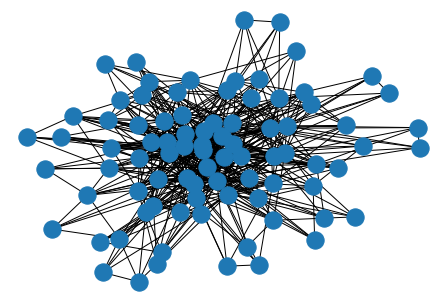

In [20]:
nx.draw(G)

In [22]:
for pok in G.nodes :
    G.nodes[pok]['teams'] = apariciones[pok]

In [23]:
nx.write_gexf(G, "Gen8.gexf", version="1.2draft")

In [22]:
#apar = {}
#for team in teamList:
#    for pok in team:
#        if pok in apar :
#            apar[pok] = apar[pok] + 1
#        else :
#            apar[pok] = 1

In [23]:
#print(apar)

{'Tyranitar': 10, 'Excadrill': 4, 'Braviary': 3, 'Hydreigon': 3, 'Mimikyu': 3, 'Rotom': 6, 'Arcanine': 11, 'Dracovish': 4, 'Darmanitan': 1, 'Milotic': 2, 'Grimmsnarl': 2, 'Togekiss': 15, 'Gyarados': 2, 'Whimsicott': 11, 'Dragapult': 11, 'Gastrodon': 6, 'Corviknight': 9, 'Politoed': 13, 'Kingdra': 10, 'Duraludon': 7, 'Rillaboom': 16, 'Scizor': 3, 'Toxtricity': 1, 'Amoonguss': 19, 'Talonflame': 7, 'Porygon2': 12, 'Rhyperior': 2, 'Urshifu': 13, 'Snorlax': 2, 'Magnezone': 2, 'Hitmontop': 2, 'Ludicolo': 1, 'Escavalier': 1, 'Volcarona': 4, 'Dusclops': 13, 'Conkeldurr': 3, 'Toxicroak': 1, 'Mandibuzz': 1, 'Clefairy': 4, 'Hatterene': 7, 'Indeedee': 12, 'Marowak': 7, 'Gigalith': 2, 'Alakazam': 3, 'Azumarill': 5, 'Dhelmise': 2, 'Slowbro': 6, 'Venusaur': 3, 'Torkoal': 4, 'Incineroar': 12, 'Terrakion': 3, 'Chandelure': 1, 'Cobalion': 2, 'Primarina': 8, 'Ferrothorn': 4, 'Charizard': 3, 'Riolu': 3, 'Cinderace': 8, 'Luxray': 2, 'Kangaskhan': 1, 'Mudsdale': 1, 'Bisharp': 2, 'Mienshao': 1, 'Sylveon': 6,